In [1]:
%matplotlib inline

import pandas as pd

pd.set_option('display.max_colwidth', 120)

In [8]:
# 2. Fit the data

vectorizer.fit(wine_df['description'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
len(vectorizer.get_feature_names())

409

In [20]:
# 3. Transform based on the model
review_word_counts = vectorizer.transform(wine_df['description'])

![](images/knn1.png)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Set the parameters
knn_classifier = KNeighborsClassifier(n_neighbors = 3)

In [23]:
# 2. Fit the data
knn_classifier.fit(review_word_counts, wine_df['rating'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
# 3. Transform based on the model

knn_prediction = knn_classifier.predict(review_word_counts)

In [29]:

print(classification_report(wine_df['rating'], knn_prediction))




             precision    recall  f1-score   support

       High       0.98      0.33      0.50      3880
        Low       0.70      1.00      0.82      6120

avg / total       0.81      0.74      0.70     10000



<div class="alert alert-info">
<h3> Your turn</h3>
<p> What is the f1 score for the model?

</div>


What about fit on a different data?

In [30]:
wine_df_test = wine_df_full.sample(n = 10000)

In [31]:
# numbers into words
# don't rebuild the model, just predict.

wdt_tf = vectorizer.transform(wine_df_test['description'])

In [32]:
# don't rebuild the model, just predict.

test_prediction = knn_classifier.predict(wdt_tf)

In [34]:
print(classification_report(wine_df['rating'], test_prediction))



             precision    recall  f1-score   support

       High       0.40      0.07      0.12      3880
        Low       0.61      0.93      0.74      6120

avg / total       0.53      0.60      0.50     10000



![](images/knn2.png)

<div class="alert alert-info">
<h3> Your turn</h3>
<p> What about changing your model to 6 neighbors? Does it fit better? Do you have the same results as other members of your group?

</div>


In [35]:
for n in [2, 4, 6, 12]:
    print(n)
    knn_classifier = KNeighborsClassifier(n_neighbors = n)
    knn_classifier.fit(review_word_counts, wine_df['rating'])
    
    train_predict = knn_classifier.predict(review_word_counts)
    print(accuracy_score(wine_df['rating'], train_predict))
    
    test_predict = knn_classifier.predict(wdt_tf)
    print(accuracy_score(wine_df_test['rating'], test_predict))



2
0.98
0.7381
4
0.7648
0.6853
6
0.7049
0.6616
12
0.6538
0.6343


In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
# old model: knn_classifier = KNeighborsClassifier(n_neighbors = 3)

parameters = {'n_neighbors' : [2,3, 7],
              'weights'      : ['distance', 'uniform']}
              

In [39]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    parameters, 
                    cv = 5)

![](images/cv.png)

In [40]:
grid.fit(review_word_counts, wine_df['rating'])

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 7], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
grid.cv_results_

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anac

{'mean_fit_time': array([0.01243081, 0.01146436, 0.01231976, 0.01234374, 0.01134434,
        0.01248574]),
 'mean_score_time': array([0.6254056 , 0.57316837, 0.72712083, 0.66340117, 0.74647989,
        0.76884518]),
 'mean_test_score': array([0.6857, 0.7012, 0.6585, 0.6561, 0.6451, 0.6423]),
 'mean_train_score': array([1.      , 0.979925, 1.      , 0.734575, 1.      , 0.66275 ]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance', 'uniform', 'distance', 'uniform',
                    'distance', 'uniform'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2, 'weights': 'distance'},
  {'n_neighbors': 2, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighb

In [42]:
pd.DataFrame(grid.cv_results_)

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anac

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012431,0.625406,0.6857,1.000000,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",2,0.6965,1.000,...,0.6865,1.000000,0.6785,1.000000,0.6900,1.000000,0.000505,0.066344,0.007257,0.000000
1,0.011464,0.573168,0.7012,0.979925,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",1,0.7060,0.978,...,0.7050,0.979375,0.6940,0.979875,0.7095,0.980625,0.000676,0.011850,0.007104,0.001251
2,0.012320,0.727121,0.6585,1.000000,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",3,0.6560,1.000,...,0.6600,1.000000,0.6580,1.000000,0.6605,1.000000,0.000366,0.072293,0.001612,0.000000
3,0.012344,0.663401,0.6561,0.734575,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",4,0.6540,0.737,...,0.6595,0.730250,0.6545,0.739500,0.6575,0.733125,0.000513,0.057693,0.002083,0.003269
4,0.011344,0.746480,0.6451,1.000000,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",5,0.6450,1.000,...,0.6425,1.000000,0.6445,1.000000,0.6480,1.000000,0.000458,0.016324,0.001772,0.000000
5,0.012486,0.768845,0.6423,0.662750,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",6,0.6425,0.665,...,0.6410,0.659875,0.6410,0.668500,0.6450,0.659500,0.000510,0.052155,0.001470,0.003478


In [43]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [45]:
train_prediction = grid.best_estimator_.predict(review_word_counts)

print(accuracy_score(wine_df['rating'], train_prediction))

0.98


In [47]:
knn_best_estimator = grid.best_estimator_

test_prediction  = knn_best_estimator.predict(wdt_tf)


print(classification_report(wine_df_test['rating'], test_prediction))

             precision    recall  f1-score   support

       High       0.84      0.42      0.56      3956
        Low       0.71      0.95      0.81      6044

avg / total       0.76      0.74      0.71     10000



<div class="alert alert-info">
<h3> Your turn</h3>
<p> What is the optimal settings for k-nearest neighbor model?
</div>


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
                     ('vectorizer' , CountVectorizer()),
                     ('classifier' , KNeighborsClassifier())
                    ])

parameters = {'vectorizer__max_features' : [300, 500, 700],
              'classifier__n_neighbors' : [2,3, 5] }



In [68]:
grid        = GridSearchCV(pipeline,
                           parameters,
                           n_jobs = -1,
                           cv = 3,
                           return_train_score = True,
                           verbose = 1)

In [69]:
grid.fit(wine_df['description'], wine_df['rating'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vectorizer__max_features': [300, 500, 700], 'classifier__n_neighbors': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

<div class="alert alert-info">
<h3> Your turn</h3>
<p> How does this compare to a logistic regression model?
<code> google sklearn logistic regression </code>
</div>



In [67]:
pd.DataFrame(grid.cv_results_)

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anac

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__n_neighbors,param_vectorizer__max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.598258,2.685512,0.7243,0.952250,2,300,"{'classifier__n_neighbors': 2, 'vectorizer__max_features': 300}",1,0.724355,0.949895,0.726673,0.954402,0.721872,0.952452,0.003394,0.018643,0.001960,0.001846
1,0.582437,2.546346,0.7215,0.965650,2,500,"{'classifier__n_neighbors': 2, 'vectorizer__max_features': 500}",3,0.727355,0.959646,0.727573,0.968052,0.709571,0.969252,0.013307,0.115461,0.008435,0.004273
2,0.610783,2.521556,0.7236,0.969000,2,700,"{'classifier__n_neighbors': 2, 'vectorizer__max_features': 700}",2,0.728554,0.963546,0.727573,0.969402,0.714671,0.974051,0.025366,0.010965,0.006326,0.004298
3,0.609263,2.527058,0.6987,0.803550,3,300,"{'classifier__n_neighbors': 3, 'vectorizer__max_features': 300}",4,0.705459,0.805281,0.700270,0.800060,0.690369,0.805310,0.011740,0.004321,0.006260,0.002468
4,0.632821,2.604387,0.6847,0.782850,3,500,"{'classifier__n_neighbors': 3, 'vectorizer__max_features': 500}",6,0.691662,0.787579,0.684668,0.781911,0.677768,0.779061,0.007089,0.036815,0.005672,0.003540
5,0.777215,2.901209,0.6807,0.778551,3,700,"{'classifier__n_neighbors': 3, 'vectorizer__max_features': 700}",7,0.686563,0.789379,0.680168,0.775461,0.675368,0.770811,0.160461,0.205566,0.004586,0.007889
6,0.906246,3.479473,0.6947,0.756500,5,300,"{'classifier__n_neighbors': 5, 'vectorizer__max_features': 300}",5,0.700960,0.757726,0.693669,0.750112,0.689469,0.761662,0.133283,0.092705,0.004748,0.004794
7,0.759941,3.473811,0.6774,0.736050,5,500,"{'classifier__n_neighbors': 5, 'vectorizer__max_features': 500}",8,0.687163,0.744224,0.678068,0.732413,0.666967,0.731513,0.042536,0.118061,0.008259,0.005792
8,0.699978,2.871981,0.6760,0.726950,5,700,"{'classifier__n_neighbors': 5, 'vectorizer__max_features': 700}",9,0.682364,0.736124,0.675368,0.719064,0.670267,0.725664,0.017384,0.161824,0.004959,0.007024


And now for something different

<div class="alert alert-info">
<h3> Your turn</h3>
<p> As a group, take a look at the text of the wine descriptions. Ignore the ratings. What different themes do you find?
</div>




![](images/lda.jpg)

In [84]:
wine_df['description'].values[250]

"There's a strong peach-fuzz aroma enveloping this wine. It's unoaked, tasting overly rich and oily."

In [85]:
from sklearn.decomposition import LatentDirichletAllocation



In [87]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             max_df      = .50,
                             min_df      = .01,
                             max_features = None)

In [88]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [131]:
review_word_counts = vectorizer.transform(wine_df['description'])

In [132]:
lda = LatentDirichletAllocation(n_components   = 5)

lda.fit(review_word_counts)

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [91]:
lda.fit(review_word_counts)

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

What words are associated with what topics?

LatentDirichletAllocation is bad a showing results in a pretty way.

In [92]:
def column_swap(column):
    column = column.sort_values(ascending = False)
    return column.index

def topic_words_df(lda_model, vectorizer):
    '''
    Generate dataframe of words associated with a topic model.
    '''
    
    word_topic_scores = lda_model.components_.T
    vocabulary        = vectorizer.get_feature_names()
    
    
    topic_words_df = pd.DataFrame(word_topic_scores,
                                  index = vocabulary)
    
    topic_words_df = topic_words_df.apply(column_swap).reset_index(drop = True).rename_axis('rank')
    
    topic_words_df.index = topic_words_df.index + 1
    
    return topic_words_df

In [93]:
topic_words_df(lda, vectorizer).head(10)

,0,1,2,3,4
rank,,,,,
1,flavors,wine,flavors,aromas,in
2,on,to,in,palate,on
3,palate,drink,wine,finish,black
4,apple,that,blend,on,oak
5,on the,from,cabernet,flavors,flavors
6,citrus,ripe,red,aromas of,to
7,acidity,acidity,soft,cherry,chocolate
8,finish,fruit,fruit,berry,wine
9,to,has,that,fruit,in the


<div class="alert alert-info">
<h3> Your turn</h3>
<p> As a group, try different options for your vectorizer and number of topics. What set of parameters creates the most coherent topics?

</div>



<div class="alert alert-info">
<h3> Your turn</h3>
<p> What were the major themes in Donald Trump campaign speeches?
</div>



In [95]:
ge_df = pd.read_json('data/ge_speeches.json')

In [128]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             stop_words  = ['lot', 'percent'],
                             max_df      = .60,
                             min_df      = .01,
                             max_features = None)

vectorizer.fit(ge_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['lot', 'percent'], strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [129]:
ge_tf = vectorizer.transform(ge_df['text'])

In [130]:
lda = LatentDirichletAllocation(n_components   = 10)

lda.fit(ge_tf)

topic_words_df(lda, vectorizer).head(10)

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9
rank,,,,,,,,,,
1,illegal,him,cyber,kids,isis,citizens,growth,cities,folks,folks
2,immigration,kids,review,him,terrorism,administration,trillion,regulations,doesn,bad
3,administration,friends,attacks,everybody,radical,illegal,income,follow,bad,isis
4,obamacare,each,justice,kind,islamic,immigration,childcare,donors,cities,doesn
5,folks,gwen,department,something,defense,high,regulations,policies,everybody,pennsylvania
6,mexico,black,defense,college,east,failed,savings,rebuild,isis,illegal
7,border,doesn,best,each,iraq,10,wealth,policy,failed,ago
8,cities,joyce,both,friends,war,kids,china,citizens,didn,ok
9,companies,kind,enforcement,still,policy,best,cost,interests,thing,story


What documents are associated with what topics?

In [133]:
wine_topics = lda.transform(review_word_counts)

In [134]:
wine_topics

array([[0.01820025, 0.29652361, 0.11186351, 0.33473465, 0.23867797],
       [0.0250004 , 0.02517967, 0.02500055, 0.02527369, 0.89954568],
       [0.05000828, 0.05000008, 0.05000007, 0.79967762, 0.05031396],
       ...,
       [0.39021072, 0.03333402, 0.03333387, 0.0339383 , 0.5091831 ],
       [0.05073342, 0.05000071, 0.05046833, 0.79774203, 0.05105551],
       [0.04055079, 0.04000018, 0.04000014, 0.83770459, 0.0417443 ]])

In [135]:
pd.DataFrame(wine_topics).head(10)

,0,1,2,3,4
0,0.018200,0.296524,0.111864,0.334735,0.238678
1,0.025000,0.025180,0.025001,0.025274,0.899546
2,0.050008,0.050000,0.050000,0.799678,0.050314
3,0.259258,0.020000,0.020168,0.680060,0.020514
4,0.022322,0.133351,0.022223,0.022982,0.799122
5,0.082002,0.012501,0.012516,0.012655,0.880326
6,0.016780,0.016670,0.016672,0.016750,0.933127
7,0.484423,0.025001,0.149840,0.315591,0.025144
8,0.113505,0.346898,0.012549,0.212557,0.314491
9,0.015924,0.015392,0.015385,0.937815,0.015484


We can now use our topics as features

In [136]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

knn_classifier.fit(wine_topics, wine_df['rating'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [137]:
train_prediction = knn_classifier.predict(wine_topics)

In [138]:
print(accuracy_score(wine_df['rating'], train_prediction))



1.0


In [143]:
test_tf     = vectorizer.transform(wine_df_test['description'])
test_topics = lda.transform(test_tf)
test_prediction = knn_classifier.predict(test_topics)

In [144]:
print(classification_report(wine_df_test['rating'], test_prediction))


             precision    recall  f1-score   support

       High       0.64      0.59      0.61      3956
        Low       0.74      0.78      0.76      6044

avg / total       0.70      0.71      0.70     10000



<div class="alert alert-info">
<h3> Your turn</h3>
<p> Using your best topic model, what is the prediction rate for your best k nearest neighbors model?

</div>


Let's do it again, but with a different data set

In [145]:
bg_df = pd.read_csv('data/boardgames.csv')

In [146]:
bg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13720 entries, 0 to 13719
Data columns (total 58 columns):
Unnamed: 0                              13720 non-null int64
index                                   13720 non-null int64
name                                    13720 non-null object
description                             13720 non-null object
max_players                             13720 non-null float64
min_players                             13720 non-null float64
min_playtime                            13720 non-null float64
max_playtime                            13720 non-null float64
min_age                                 13720 non-null float64
category                                13720 non-null object
mechanics                               13720 non-null object
year_published                          13720 non-null float64
weighted_score                          13720 non-null float64
number_of_comments                      13720 non-null float64
complexity       

In [ ]:
bg_df.head()

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Load up this dataset in your other workbook. Topic model the game descriptions.

</div>



In [175]:
from sklearn.feature_extraction.text import CountVectorizer


In [176]:
vectorizer = CountVectorizer(max_df=.6,
                             min_df=.01,
                             stop_words= 'english')

In [177]:
vectorizer.fit(bg_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [178]:
bg_wf = vectorizer.transform(bg_df['description'])

In [163]:
pd.DataFrame(bg_wf.todense(), columns=vectorizer.get_feature_names()).sum().sort_values().tail()

points     6660
play       8171
card      11868
cards     18295
player    20632
dtype: int64

In [164]:
len(vectorizer.get_feature_names())

1350

In [165]:
from sklearn.decomposition import LatentDirichletAllocation

In [166]:
lda = LatentDirichletAllocation(n_components   = 10,
                                n_jobs         = -1,
                               learning_method = 'online')

In [167]:
lda.fit(bg_wf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [168]:
topics = lda.transform(bg_wf)

In [169]:
topics

array([[0.03679355, 0.00128221, 0.16932467, ..., 0.00128258, 0.23042156,
        0.21902049],
       [0.00166734, 0.04633801, 0.00166712, ..., 0.66111848, 0.00166688,
        0.00166742],
       [0.13538142, 0.00178592, 0.0017863 , ..., 0.2467892 , 0.00178637,
        0.00178612],
       ...,
       [0.00400069, 0.00400016, 0.13058438, ..., 0.00400077, 0.04660411,
        0.00400005],
       [0.00108719, 0.05541306, 0.06481335, ..., 0.00108721, 0.19867116,
        0.00108727],
       [0.20425653, 0.00175463, 0.38152976, ..., 0.00175504, 0.00175484,
        0.043443  ]])

In [171]:
pd.DataFrame(topics)

,0,1,2,3,4,5,6,7,8,9
0,0.036794,0.001282,0.169325,0.001282,0.001282,0.338028,0.001282,0.001283,0.230422,0.219020
1,0.001667,0.046338,0.001667,0.184943,0.001667,0.097597,0.001667,0.661118,0.001667,0.001667
2,0.135381,0.001786,0.001786,0.055077,0.077460,0.476361,0.001786,0.246789,0.001786,0.001786
3,0.416140,0.003704,0.003705,0.003704,0.003704,0.274632,0.003704,0.003705,0.066949,0.220052
4,0.001924,0.001923,0.046196,0.001923,0.001923,0.538005,0.001923,0.001923,0.402336,0.001923
5,0.069201,0.003449,0.251228,0.003449,0.003449,0.273391,0.003449,0.003449,0.121061,0.267874
6,0.603030,0.002381,0.080042,0.002381,0.230618,0.072023,0.002381,0.002381,0.002381,0.002381
7,0.003705,0.003705,0.399030,0.065456,0.003705,0.509580,0.003705,0.003706,0.003705,0.003704
8,0.002000,0.002000,0.376853,0.002000,0.002001,0.607145,0.002000,0.002000,0.002000,0.002000
9,0.163626,0.000427,0.027896,0.000427,0.000427,0.368236,0.051747,0.386358,0.000427,0.000427


In [172]:
def column_swap(column):
    column = column.sort_values(ascending = False)
    return column.index

def topic_words_df(lda_model, vectorizer):
    '''
    Generate dataframe of words associated with a topic model.
    '''
    
    word_topic_scores = lda_model.components_.T
    vocabulary        = vectorizer.get_feature_names()
    
    
    topic_words_df = pd.DataFrame(word_topic_scores,
                                  index = vocabulary)
    
    topic_words_df = topic_words_df.apply(column_swap).reset_index(drop = True).rename_axis('rank')
    
    topic_words_df.index = topic_words_df.index + 1
    
    return topic_words_df




In [173]:
top_words = topic_words_df(lda, vectorizer)



In [174]:
top_words.head(10)

,0,1,2,3,4,5,6,7,8,9
rank,,,,,,,,,,
1,player,rules,time,battle,war,player,characters,cards,games,french
2,dice,campaign,play,attack,units,points,character,card,rules,british
3,board,counters,make,victory,combat,city,heroes,player,new,north
4,tiles,german,win,army,player,building,treasure,play,edition,american
5,pieces,battle,ll,fight,map,end,monsters,hand,play,000
6,tile,scale,best,master,forces,turn,dragon,deck,set,town
7,die,scenarios,way,mission,world,build,adventure,points,version,strength
8,roll,map,just,enemy,unit,actions,dungeon,round,original,south
9,turn,army,race,power,movement,money,magic,turn,includes,save


In [ ]:
def lda_predict(model, tf_matrix):
    prediction = model.transform(tf_matrix)
    return pd.DataFrame(prediction)

In [ ]:
lda_predict(lda, bg_wf)

What about a different method?

In [147]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image



dtc = DecisionTreeClassifier(max_depth = 3, #  Split the sample only three times.
                             min_samples_leaf = 10) # Make sure each leaf 




In [148]:
x_names = ['max_players', 'min_players', 'min_playtime', 'max_playtime', 'min_age']

dtc.fit(bg_df[x_names], bg_df['quality_game'])



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

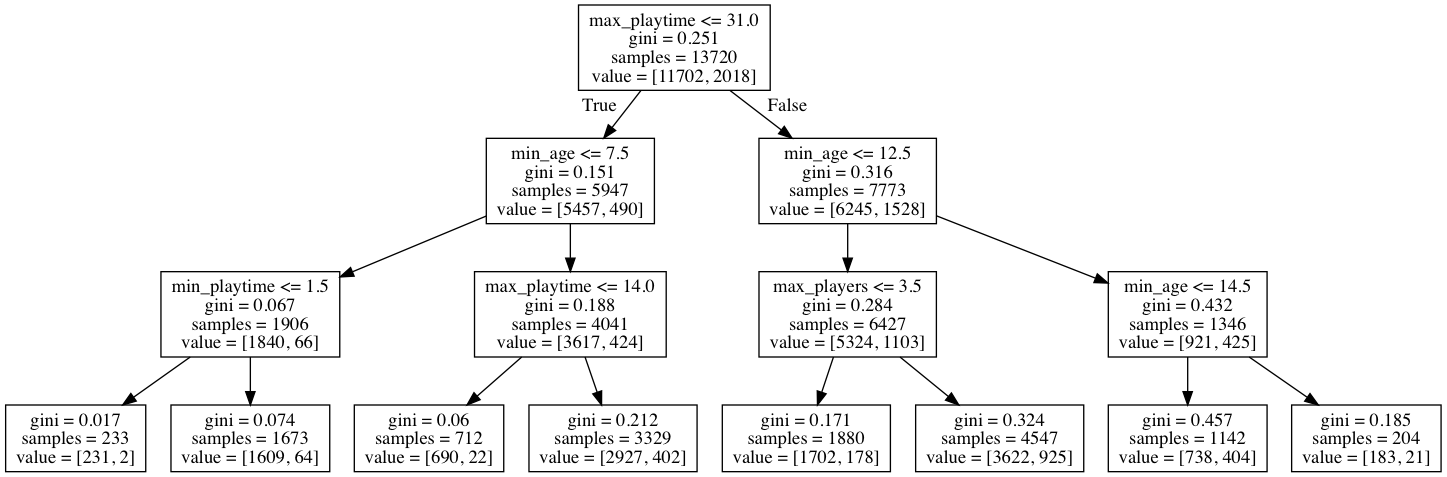

In [149]:
export_graphviz(dtc, 
                out_file='dtc.dot', 
                feature_names=x_names)
                
!dot -Tpng dtc.dot -o  dtc.png
Image(filename='dtc.png') 

In [179]:
from sklearn.ensemble import RandomForestClassifier




In [180]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
rf.fit(bg_df[x_names], bg_df['quality_game'])



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
imp = pd.DataFrame(rf.feature_importances_, index = x_names)
imp

,0
max_players,0.241430
min_players,0.108830
min_playtime,0.203080
max_playtime,0.237414
min_age,0.209246


In [187]:
categories = ['category_cardgame',
       'category_wargame', 'category_fantasy', 'category_dice',
       'category_partygame', 'category_fighting', 'category_sciencefiction',
       'category_abstractstrategy', 'category_economic',
       'category_childrensgame', 'category_worldwarii', 'category_bluffing',
       'category_animals', 'category_humor', 'category_actiondexterity',
       'category_adventure', 'category_moviestvradiotheme',
       'category_medieval', 'category_deduction', 'category_miniatures']

mechanics = ['mechanic_dicerolling', 'mechanic_handmanagement',
       'mechanic_hexandcounter', 'mechanic_setcollection',
       'mechanic_variableplayerpowers', 'mechanic_none',
       'mechanic_tileplacement', 'mechanic_modularboard',
       'mechanic_carddrafting', 'mechanic_rollspinandmove',
       'mechanic_areacontrolareainfluence', 'mechanic_auctionbidding',
       'mechanic_simulation', 'mechanic_areamovement',
       'mechanic_simultaneousactionselection',
       'mechanic_actionpointallowancesystem', 'mechanic_cooperativeplay',
       'mechanic_pointtopointmovement', 'mechanic_partnerships',
       'mechanic_memory']

In [202]:
x_names = ['complexity', 'max_players', 'min_players', 'min_playtime', 'max_playtime', 'min_age'] 
x_names = x_names + mechanics + categories


,Unnamed: 0,index,name,description,max_players,min_players,min_playtime,max_playtime,min_age,category,...,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,Die Macher,"Die Macher is a game about seven sequential political races in different regions of Germany. Players are in charge of national political parties, and must manage limited resources to help their party to victory. The ...",5.0,3.0,240.0,240.0,14.0,"Economic, Negotiation, Political",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Dragonmaster,"Dragonmaster is a trick-taking card game based on an older game called Coup d'etat. Each player is given a supply of plastic gems, which represent points. Each player will get to be the dealer for five different hand...",4.0,3.0,30.0,30.0,12.0,"CardGame, Fantasy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,Samurai,"Part of the Knizia tile-laying trilogy, Samurai is set in medieval Japan. Players compete to gain the favor of three factions: samurai, peasants, and priests, which are represented by helmet, rice paddy, and Buddha t...",4.0,2.0,30.0,60.0,10.0,"AbstractStrategy, Medieval",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,Tal der KÃ¶nige,"When you see the triangular box and the luxurious, large blocks, you can tell this game was designed to be beautiful as well as functional. The object of the game is to build pyramids out of the different colored bl...",4.0,2.0,60.0,60.0,12.0,Ancient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,Acquire,"In Acquire, each player strategically invests in businesses, trying to retain a majority of stock. As the businesses grow with tile placements, they also start merging, giving the majority stockholders of the acquir...",6.0,3.0,90.0,90.0,12.0,Economic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,5.0,Mare Mediterraneum,"In the ancient lands along the Mediterranean, players attempt to satisfy their unique victory conditions via trade, war and construction. This lavishly produced game contains tons of wooden game components and a bea...",6.0,2.0,240.0,240.0,12.0,"Civilization, Nautical",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,6.0,Cathedral,"In Cathedral, each player has a set of pieces of a different color. The pieces are in the shapes of buildings, covering from one to five square units. The first player takes the single neutral Cathedral piece and pla...",2.0,2.0,20.0,20.0,8.0,AbstractStrategy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,7.0,Lords of Creation,"In this interesting offering from Warfrog, players become Gods seeking to dominate a world with their followers. The first part of the game involves constructing the game board, after which players take turns using ...",5.0,2.0,120.0,120.0,12.0,"Civilization, Fantasy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,8.0,El Caballero,"Although referred to as a sequel to El Grande, El Caballero shares few aspects with its namesake, being a fun but intense brain-burner in which players explore and attempt to control the lands and waterways of the Ne...",4.0,2.0,90.0,90.0,13.0,Exploration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,9.0,Elfenland,Elfenland is a redesign of the original White Wind game Elfenroads. The game is set in the mythical world of the elves. A group of fledgling elves (the players) are charged with visiting as many of the twenty Elfen...,6.0,2.0,60.0,60.0,10.0,"Fantasy, Travel",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:


# Google "sklearn random forest"
from sklearn.model_selection import GridSearchCV

param_dist = {"max_features": [4],
              "min_samples_split": [10], 
             "class_weight" : ["balanced", None],
             "n_estimators" : [20, 25, 30, 35]}


rfgs = GridSearchCV( RandomForestClassifier(),
                  param_dist, 
                  cv = 5,                  
                  verbose=1 )

In [205]:
rfgs.fit(bg_df[x_names], bg_df['quality_game'])



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4], 'min_samples_split': [10], 'class_weight': ['balanced', None], 'n_estimators': [20, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [206]:
rfgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [207]:
rf_best = rfgs.best_estimator_
pd.DataFrame(rf_best.feature_importances_, index = x_names).sort_values(by = 0)

,0
category_childrensgame,0.003584
category_actiondexterity,0.004004
category_partygame,0.004981
category_worldwarii,0.005507
category_moviestvradiotheme,0.006864
category_abstractstrategy,0.007163
category_humor,0.007265
mechanic_cooperativeplay,0.007869
mechanic_simulation,0.007869
category_miniatures,0.008260


In [158]:
results = pd.DataFrame(rfgs.cv_results_)

results

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anac

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_class_weight,param_max_features,param_min_samples_split,param_n_estimators,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.035971,0.003265,0.692347,0.766254,balanced,4,10,3,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 3}",12,...,0.745262,0.749271,0.690849,0.765510,0.597886,0.769518,0.002877,0.000604,0.060190,0.009190
1,0.044662,0.003466,0.698324,0.783473,balanced,4,10,5,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 5}",11,...,0.763120,0.775966,0.705432,0.783912,0.612104,0.773982,0.004239,0.000408,0.051645,0.007626
2,0.083042,0.005658,0.712245,0.789450,balanced,4,10,10,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 10}",9,...,0.770408,0.791181,0.711994,0.788922,0.617572,0.785461,0.001559,0.000153,0.056820,0.003434
3,0.127855,0.008309,0.716399,0.800784,balanced,4,10,15,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 15}",7,...,0.765671,0.794916,0.723296,0.800401,0.622676,0.801221,0.006741,0.000515,0.054566,0.005317
4,0.202073,0.013132,0.711953,0.795536,balanced,4,10,25,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 25}",10,...,0.763848,0.788448,0.720744,0.795117,0.608458,0.791382,0.002880,0.000554,0.056656,0.007897
5,0.426163,0.029572,0.715889,0.800091,balanced,4,10,50,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 50}",8,...,0.777697,0.792912,0.726577,0.804409,0.609552,0.797030,0.012709,0.002753,0.059357,0.008176
6,0.032092,0.002788,0.827551,0.875638,None,4,10,3,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 3}",6,...,0.860423,0.872540,0.840685,0.873098,0.741524,0.878564,0.001444,0.000186,0.043707,0.002381
7,0.065479,0.005214,0.828717,0.878280,None,4,10,5,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 5}",5,...,0.861152,0.874453,0.841415,0.877471,0.748451,0.882664,0.001335,0.000455,0.040815,0.002629
8,0.176274,0.010163,0.838557,0.881013,None,4,10,10,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 10}",1,...,0.863338,0.878007,0.849435,0.879840,0.773970,0.885215,0.056332,0.001918,0.032840,0.002381
9,0.220291,0.013547,0.834913,0.881378,None,4,10,15,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 15}",4,...,0.864431,0.878371,0.840321,0.879111,0.764127,0.884941,0.026049,0.001387,0.036385,0.002402


<div class="alert alert-info">
<h3> Your super big challenge</h3>
<p> You want to make a quality game. Based on this dataset, what sort of game should you make? Use a random forest model to find the best set up parameters. 
<p> Bonus challenge: Use both features in the data set and ones you construct from a topic model!

</div>


In [ ]:
rf_prediction = rf_best.predict_proba(bg_df[x_names])

In [ ]:
from sklearn.calibration import calibration_curve


def calplot(y_observed, y_predicted):
    rf_y, rf_x = calibration_curve(y_observed, y_predicted[:,1], n_bins=10)
    pd.DataFrame([rf_x , rf_y]).T.plot.scatter(x=0, y=1, figsize = (5,5))

In [ ]:
calplot(bg_df['quality_game'], rf_prediction)

In [ ]:
idf = pd.Series(rf_best.feature_importances_, index = x_names)

idf.sort_values()

In [ ]:
idf.sort_values().plot(kind='barh', )

In [ ]:
bg_df.keys()